In [1]:
# from lfs_tree import *
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import pydot
import networkx as nx
from string import Template
import pandas as pd
import glob
import pydot
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import pickle
import os
from IPython.display import Image, display
import matplotlib as mpl

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configure global font size settings
mpl.rcParams.update({
    'font.size': 25,  # Default font size for titles, labels, and tick labels
    'axes.labelsize': 25,  # Font size for axis labels
    'xtick.labelsize': 20,  # Font size for x-axis tick labels
    'ytick.labelsize': 18,  # Font size for y-axis tick labels
    'legend.fontsize': 20  # Font size for the legend
})


In [2]:
rules_dict = {}
for f in glob.glob('../../chatgpt_rbbm/chatgpt_rules/*_gpt_rules.pkl'):
    with open(f, 'rb') as file:
        rules_dict[f.split('/')[-1].split('_')[0]] = pickle.load(file)


In [3]:
rules_dict

{'painter': [pred:Stem_predicate-stem-(chicago), id:1
  parent_id: NaN
  
  
  	label:-1, id: 2
  parent_id: 1
  1:[]
  0:[]
  
  
  	label:0, id: 3
  parent_id: 1
  1:[]
  0:[]
  ,
  pred:Stem_predicate-stem-(art), id:1
  parent_id: NaN
  
  
  	label:-1, id: 2
  parent_id: 1
  1:[]
  0:[]
  
  
  	label:0, id: 3
  parent_id: 1
  1:[]
  0:[]
  ,
  pred:Stem_predicate-stem-(draw), id:1
  parent_id: NaN
  
  
  	label:-1, id: 2
  parent_id: 1
  1:[]
  0:[]
  
  
  	label:0, id: 3
  parent_id: 1
  1:[]
  0:[]
  ,
  pred:Stem_predicate-stem-(exhibit), id:1
  parent_id: NaN
  
  
  	label:-1, id: 2
  parent_id: 1
  1:[]
  0:[]
  
  
  	label:0, id: 3
  parent_id: 1
  1:[]
  0:[]
  ,
  pred:Stem_predicate-stem-(paint), id:1
  parent_id: NaN
  
  
  	label:-1, id: 2
  parent_id: 1
  1:[]
  0:[]
  
  
  	label:0, id: 3
  parent_id: 1
  1:[]
  0:[]
  ,
  pred:Stem_predicate-stem-(galleri), id:1
  parent_id: NaN
  
  
  	label:-1, id: 2
  parent_id: 1
  1:[]
  0:[]
  
  
  	label:0, id: 3
  par

In [4]:
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def show_trees(directory):
    print(directory)
    treefiles = glob.glob(f'{directory}*tree_*')
    print(len(treefiles))
#     print(treefiles)
    num_trees_per_strat = len(treefiles)/2
#     for i in range(0, int(num_trees_per_strat)):
    for f in glob.glob(f'{directory}*tree_*'):
        file = open(f)
        dot_string = file.read()
        print(f)
        graph = pydot.graph_from_dot_data(dot_string)[0]
        view_pydot(graph)
        print('\n')
        
def show_stats(directory):
    f = glob.glob(f'{directory}*experiment_stats')[0]
#     print(f)
#                                 experiment_stats
#     file = open('../intro_example/experiment_stats')
    df = pd.read_csv(f)
#     print(df)
    return df

def show_user_inputs(directory):
    f = glob.glob(f'{directory}sampled*')[0]
    df = pd.read_csv(f)
    print(list(df))
    return df.sort_values(by=['text'])

def view_repair_bookkeeping_results(directory):
    print(glob.glob(f'{directory}*book_keeping_dict*'))
    f = glob.glob(f'{directory}*book_keeping_dict*')[0]
#               20230921002723fix_book_keeping_dict.pkl
    with open(f, 'rb') as file:
        # Load the object from the file
        loaded_object = pickle.load(file)
#         print("Object loaded successfully:")
#         print(loaded_object)
    return loaded_object

In [5]:
# postproecssing 
# show fix rate, confirm preserve rate, global rate
# find some reasonable repairs

In [6]:
dir4 = '../../rbbm_src/gpt_experiment_results_folders_vary_uq/'

In [7]:
import os
import re
import glob

# Path to the main directory
main_folder = dir4
# folders = [dir4]


def read_and_print_file_content(file_path):
    return pd.read_csv(file_path)

# Regular expression pattern for matching subfolder names (e.g., 'YYYY-MM-DD')
folder_pattern =  r'_20240201.*'

# File pattern to match within subfolders (e.g., all '.txt' files)
file_pattern = 'experiment_stats'

stats_dfs = []
# Iterate over all items in the main folder
for item in os.listdir(main_folder):
    # Full path of the item
    path = os.path.join(main_folder, item)
#     print(path)
    # Check if it's a folder and matches the pattern
    if os.path.isdir(path) and re.match(folder_pattern, item):
#         print(path)
        # Use glob to find files that match the file pattern in the subfolder
        for file in glob.glob(f'{path}/*experiment_stats'):
            df = read_and_print_file_content(file)
            stats_dfs.append(df)


In [8]:
stats_df = pd.concat(stats_dfs)

In [9]:
stats_df

,strat,seed,pickle_file_name,table_name,timestamp_str,deletion_type,deletion_absolute_threshold,rbbm_runtime,bbox_runtime,avg_tree_size_increase,user_input_size,complaint_ratio,num_complaints,num_confirmations,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,lf_source,retrain_after_percent,retrain_accuracy_thresh,load_funcs_from_pickle,pre_deletion_threshold
0,information_gain,1953,placeholder_name,painter_architect,20240201082418,ratio,10,0.989,113.077,0.483333,40,0.5,20,20,0.953,0.300,1.000,0.956,11454,11454,120,0.0,120,120,False,False,undefined,1,1,False,0.0
0,information_gain,1953,placeholder_name,professor_teacher,20240201082650,ratio,10,1.040,254.645,0.418182,40,0.5,20,20,0.828,0.150,1.000,0.836,22323,22323,110,0.0,110,110,False,False,undefined,1,1,False,0.0
0,information_gain,1953,placeholder_name,youtube,20240201083208,ratio,10,0.265,10.377,0.276923,40,0.5,20,20,0.692,0.100,1.000,0.696,1441,1441,65,0.0,65,65,False,False,undefined,1,1,False,0.0
0,information_gain,1953,placeholder_name,amazon,20240201083227,ratio,10,2.146,1677.022,0.465116,40,0.5,20,20,0.728,0.450,0.950,0.815,156138,156138,86,0.0,86,86,False,False,undefined,1,1,False,0.0
0,information_gain,1953,placeholder_name,painter_architect,20240201090706,ratio,10,2.715,115.306,0.950000,80,0.5,40,40,0.953,0.425,1.000,0.952,11454,11454,120,0.0,120,120,False,False,undefined,1,1,False,0.0
0,information_gain,1953,placeholder_name,professor_teacher,20240201090942,ratio,10,2.411,248.711,0.763636,80,0.5,40,40,0.828,0.225,1.000,0.841,22323,22323,110,0.0,110,110,False,False,undefined,1,1,False,0.0
0,information_gain,1953,placeholder_name,youtube,20240201091456,ratio,10,0.648,10.646,0.461538,80,0.5,40,40,0.692,0.100,1.000,0.696,1441,1441,65,0.0,65,65,False,False,undefined,1,1,False,0.0
0,information_gain,1953,placeholder_name,amazon,20240201091516,ratio,10,5.868,1675.060,0.813953,80,0.5,40,40,0.728,0.300,1.000,0.782,156138,156138,86,0.0,86,86,False,False,undefined,1,1,False,0.0
0,information_gain,1456,placeholder_name,painter_architect,20240201095119,ratio,10,1.375,112.215,0.633333,40,0.5,20,20,0.953,0.450,0.950,0.952,11454,11454,120,0.0,120,120,False,False,undefined,1,1,False,0.0
0,information_gain,1456,placeholder_name,professor_teacher,20240201095348,ratio,10,1.205,208.345,0.654545,40,0.5,20,20,0.828,0.500,1.000,0.841,22323,22323,110,0.0,110,110,False,False,undefined,1,1,False,0.0


In [10]:
stats_df.sort_values(by=['fix_rate','table_name','user_input_size'])[['fix_rate','table_name',
                                                                      'user_input_size','timestamp_str']]

,fix_rate,table_name,user_input_size,timestamp_str
0,0.100,youtube,40,20240201083208
0,0.100,youtube,80,20240201091456
0,0.150,professor_teacher,40,20240201082650
0,0.225,professor_teacher,80,20240201090942
0,0.275,amazon,80,20240201115508
0,0.300,amazon,40,20240201111701
0,0.300,amazon,80,20240201091516
0,0.300,painter_architect,40,20240201082418
0,0.300,painter_architect,40,20240201122428
0,0.300,youtube,40,20240201095817


In [11]:
stats_df.sort_values(by=['fix_rate','global_accuracy'])

,strat,seed,pickle_file_name,table_name,timestamp_str,deletion_type,deletion_absolute_threshold,rbbm_runtime,bbox_runtime,avg_tree_size_increase,user_input_size,complaint_ratio,num_complaints,num_confirmations,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,lf_source,retrain_after_percent,retrain_accuracy_thresh,load_funcs_from_pickle,pre_deletion_threshold
0,information_gain,1953,placeholder_name,youtube,20240201083208,ratio,10,0.265,10.377,0.276923,40,0.5,20,20,0.692,0.100,1.000,0.696,1441,1441,65,0.0,65,65,False,False,undefined,1,1,False,0.0
0,information_gain,1953,placeholder_name,youtube,20240201091456,ratio,10,0.648,10.646,0.461538,80,0.5,40,40,0.692,0.100,1.000,0.696,1441,1441,65,0.0,65,65,False,False,undefined,1,1,False,0.0
0,information_gain,1953,placeholder_name,professor_teacher,20240201082650,ratio,10,1.040,254.645,0.418182,40,0.5,20,20,0.828,0.150,1.000,0.836,22323,22323,110,0.0,110,110,False,False,undefined,1,1,False,0.0
0,information_gain,1953,placeholder_name,professor_teacher,20240201090942,ratio,10,2.411,248.711,0.763636,80,0.5,40,40,0.828,0.225,1.000,0.841,22323,22323,110,0.0,110,110,False,False,undefined,1,1,False,0.0
0,information_gain,1992,placeholder_name,amazon,20240201115508,ratio,10,2.483,1433.489,0.534884,80,0.5,40,40,0.728,0.275,1.000,0.757,156138,156138,86,0.0,86,86,False,False,undefined,1,1,False,0.0
0,information_gain,1456,placeholder_name,youtube,20240201095817,ratio,10,0.255,10.315,0.338462,40,0.5,20,20,0.692,0.300,1.000,0.679,1441,1441,65,0.0,65,65,False,False,undefined,1,1,False,0.0
0,information_gain,1992,placeholder_name,youtube,20240201111642,ratio,10,0.261,10.607,0.492308,40,0.5,20,20,0.692,0.300,1.000,0.686,1441,1441,65,0.0,65,65,False,False,undefined,1,1,False,0.0
0,information_gain,1479,placeholder_name,youtube,20240201123139,ratio,10,0.236,12.554,0.246154,40,0.5,20,20,0.692,0.300,1.000,0.701,1441,1441,65,0.0,65,65,False,False,undefined,1,1,False,0.0
0,information_gain,1953,placeholder_name,amazon,20240201091516,ratio,10,5.868,1675.060,0.813953,80,0.5,40,40,0.728,0.300,1.000,0.782,156138,156138,86,0.0,86,86,False,False,undefined,1,1,False,0.0
0,information_gain,1992,placeholder_name,amazon,20240201111701,ratio,10,1.000,1467.853,0.232558,40,0.5,20,20,0.728,0.300,1.000,0.751,156138,156138,86,0.0,86,86,False,False,undefined,1,1,False,0.0


In [12]:
stats_df= stats_df.sort_values(by=['fix_rate'])[['user_input_size','table_name','rbbm_runtime','bbox_runtime',
                                      'avg_tree_size_increase', 
                                      'global_accuracy', 'fix_rate', 'confirm_preserve_rate',
                                       'new_global_accuracy','seed']]
stats_df = stats_df.groupby(['user_input_size', 'table_name']).mean().reset_index()
rename_dict = {'professor_teacher':'PT', 'painter_architect':'PA', 'youtube':'YTSpam','amazon':'amazon'}
stats_df['table_name'] = stats_df['table_name'].replace(rename_dict)


In [37]:
stats_df

,user_input_size,table_name,rbbm_runtime,bbox_runtime,avg_tree_size_increase,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,seed
0,40,amazon,1.49525,1547.59225,0.424419,0.7280,0.41250,0.98750,0.79425,1720.0
1,40,PA,1.15250,114.95125,0.562500,0.9530,0.41250,0.98750,0.95300,1720.0
2,40,PT,1.05025,221.53850,0.527273,0.8280,0.42500,0.98750,0.83975,1720.0
3,40,YTSpam,0.27420,10.11960,0.424615,0.7198,0.40000,1.00000,0.68940,1575.8
4,80,amazon,3.94425,1535.89500,0.720930,0.7280,0.35000,1.00000,0.78525,1720.0
5,80,PA,3.99325,115.45950,0.962500,0.9530,0.43125,0.99375,0.95175,1720.0
6,80,PT,2.90300,227.48100,0.981818,0.8280,0.44375,0.99375,0.83175,1720.0
7,80,YTSpam,0.64425,11.41725,0.569231,0.6920,0.32500,0.99375,0.71200,1720.0


In [38]:

df1=stats_df[stats_df['user_input_size']==40].sort_values('table_name')
df2=stats_df[stats_df['user_input_size']==80].sort_values('table_name')

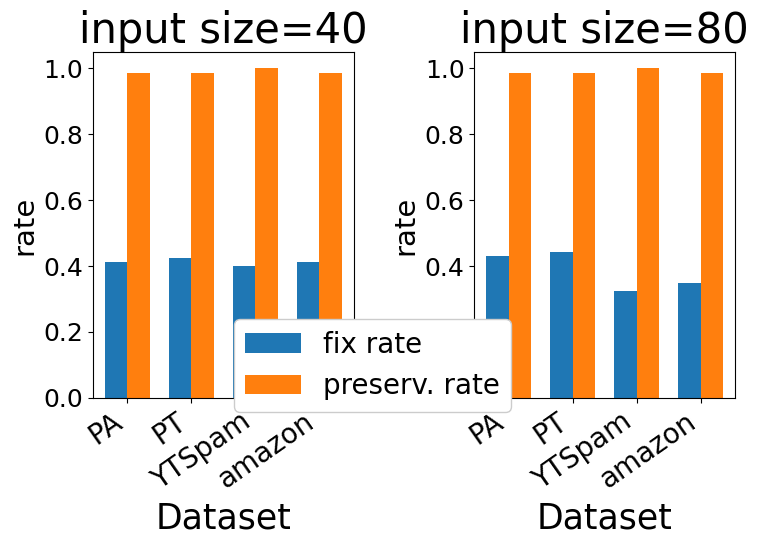

In [39]:

# Extract values and labels

table_names1 = df1['table_name']
fix_rate_values1 = df1['fix_rate']
confirm_preserve_rate_values1 = df1['confirm_preserve_rate']
x1 = np.arange(len(table_names1))

table_names2 = df2['table_name']
fix_rate_values2 = df2['fix_rate']
confirm_preserve_rate_values2 = df1['confirm_preserve_rate']
x2 = np.arange(len(table_names2))
bar_width = 0.35

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Plot the first graph on the first subplot
axes[0].bar(x1 - bar_width/2, fix_rate_values1, bar_width, label='fix rate')
axes[0].bar(x1 + bar_width/2, confirm_preserve_rate_values1, bar_width, label='preserv. rate')

# Plot the second graph on the second subplot
axes[1].bar(x2 - bar_width/2, fix_rate_values2, bar_width)
axes[1].bar(x2 + bar_width/2, confirm_preserve_rate_values2, bar_width)

# Customize the plots
# for ax in axes:
axes[0].set_xlabel('dataset')
axes[0].set_ylabel('rate',fontsize=21)
axes[0].set_title('input size=40')

# axes[0].set_title('Fix Rate and Confirm Preserve Rate per Dataset')
axes[0].set_xticks(x1)
axes[0].set_xticklabels(table_names1)
# axes[0].legend(loc='lower center')
axes[1].set_xlabel('dataset')
axes[1].set_ylabel('rate', fontsize=21)
axes[1].set_title('input size=80')

# axes[1].set_title('Fix Rate and Confirm Preserve Rate per Dataset')
axes[1].set_xticks(x2)
axes[1].set_xticklabels(table_names2)
# fig.suptitle('fix rate + confirm preserve rate', y=0.95)
# Customize the plots
legend = fig.legend(loc='center', bbox_to_anchor=(0.5, 0.345))
legend.get_frame().set_facecolor('white')  # Set the background color to white
legend.get_frame().set_alpha(1.0)  # Set the framealpha to 1.0 (fully opaque)
for ax in axes:
    ax.set_xlabel('Dataset')
#     ax.set_ylabel('Rate')
    ax.set_xticks(ax.get_xticks())  # Make sure the ticks are set
    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')  # Rotate x-axis labels for 45 degrees
#     ax.legend()
    



# Add legends for both bars
# axes[0].legend(loc='upper left',bbox_to_anchor=(-0.15, 1.2))
# axes[1].legend(loc='upper right',bbox_to_anchor=(1.15, 1.2))


# Show the plot
plt.tight_layout()
plt.savefig(f"graph_pdfs/gpt_case_study_fixconfirm.pdf", format="pdf")
plt.show()


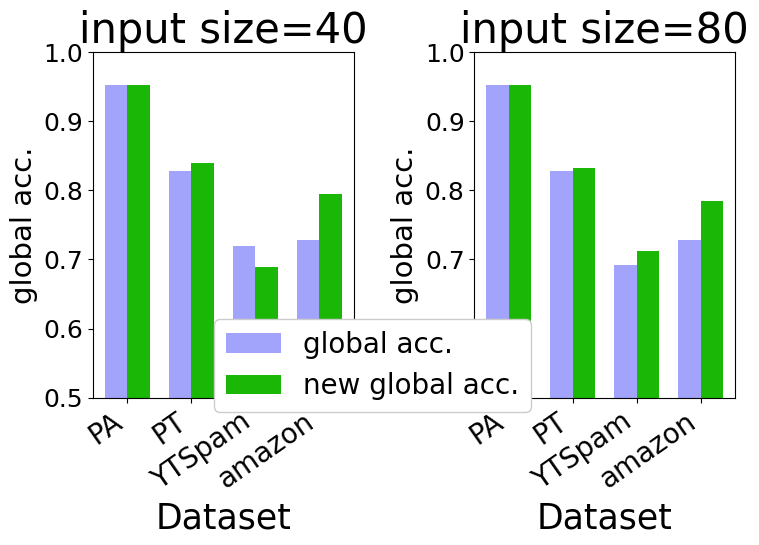

In [40]:
import matplotlib.pyplot as plt
import pandas as pd


# Extract values and labels
table_names1 = df1['table_name']
global_accuracy1 = df1['global_accuracy']
new_global_accuracy1 = df1['new_global_accuracy']
x1 = np.arange(len(table_names1))

table_names2 = df2['table_name']
global_accuracy2 = df2['global_accuracy']
new_global_accuracy2 = df2['new_global_accuracy']
x2 = np.arange(len(table_names2))
bar_width = 0.35

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Plot the first graph on the first subplot
axes[0].bar(x1 - bar_width/2, global_accuracy1, bar_width, label='global acc.', color='#a2a4fb')
axes[0].bar(x1 + bar_width/2, new_global_accuracy1, bar_width, label='new global acc.', color='#1bb706')

# Plot the second graph on the second subplot
axes[1].bar(x2 - bar_width/2, global_accuracy2, bar_width, color='#a2a4fb')
axes[1].bar(x2 + bar_width/2, new_global_accuracy2, bar_width, color='#1bb706')

# Customize the plots
# for ax in axes:
axes[0].set_xlabel('dataset')
axes[0].set_ylabel('global acc.',fontsize=21)
axes[0].set_title('input size=40')
axes[0].set_xticks(x1)
axes[0].set_xticklabels(table_names1)
axes[0].set_ylim([0.5, 1])

# axes[0].legend(loc='lower center')
axes[1].set_xlabel('dataset')
axes[1].set_ylabel('global acc.', fontsize=21)
axes[1].set_title('input size=80')
axes[1].set_xticks(x2)
axes[1].set_xticklabels(table_names2)
axes[1].set_ylim([0.5, 1])
# axes[1].legend(loc='lower center')
# fig.suptitle('global accuracy',y=0.95)

legend = fig.legend(loc='center', bbox_to_anchor=(0.5, 0.345))
legend.get_frame().set_facecolor('white')  # Set the background color to white
legend.get_frame().set_alpha(1.0)  # Set the framealpha to 1.0 (fully opaque)

for ax in axes:
    ax.set_xlabel('Dataset')
#     ax.set_ylabel('Rate')
    ax.set_xticks(ax.get_xticks())  # Make sure the ticks are set
    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')  # Rotate x-axis labels for 45 degrees
#     ax.legend()
    

# Show the plot
plt.tight_layout()
plt.savefig(f"graph_pdfs/gpt_case_study_global.pdf", format="pdf")

plt.show()


In [41]:
# check repairs
show_stats(dir4+'_20240201154712/')

,strat,seed,pickle_file_name,table_name,timestamp_str,deletion_type,deletion_absolute_threshold,rbbm_runtime,bbox_runtime,avg_tree_size_increase,user_input_size,complaint_ratio,num_complaints,num_confirmations,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,lf_source,retrain_after_percent,retrain_accuracy_thresh,load_funcs_from_pickle,pre_deletion_threshold
0,information_gain,999,placeholder_name,youtube,20240201154712,ratio,10,0.354,6.745,0.769231,40,0.5,20,20,0.831,1.0,1.0,0.685,1441,1441,65,0.0,65,65,False,False,undefined,1,1,False,0.0


In [42]:
user_inputs = show_user_inputs(dir4+'_20240201154712/')

['comment_id', 'author', 'date', 'old_text', 'expected_label', 'cid', 'stems', 'text', 'model_pred', 'vectors', 'id']


In [43]:
dir4+'_20240201154712/'

'../../rbbm_src/gpt_experiment_results_folders_vary_uq/_20240201154712/'

In [44]:
df_before_repaired = pd.read_csv('../../rbbm_src/gpt_experiment_results_folders_vary_uq/_20240201154712/20240201154712_initial_results.csv')
df_repaired = pd.read_csv('../../rbbm_src/gpt_experiment_results_folders_vary_uq/_20240201154712/20240201154712_after_fix_results.csv')

In [45]:
len(user_inputs)

40

In [46]:
user_inputs

,comment_id,author,date,old_text,expected_label,cid,stems,text,model_pred,vectors,id
3,z13kjhwrdtvjzbbtc22ag3u4nmaocb023,Jamie Breedlove,2014-11-10T18:18:04,I love your music ﻿,0,687,"['i', 'love', 'your', 'music', '\ufeff']",i love your music,-1,"-1,0,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1",3
39,z125tj4zjlngxfvxr04cg5wyhkmxhxloesk0k,Anders Lundgren,2014-11-07T18:08:44,"#nowplaying ""Weekendmix"" track 04 : Katy Perry - Roar (DJ Denis Shmelev &amp; DJ Alex Serov Remix) http://youtu.be/CevxZvSJLk8 Listen live at: www.smartfm.nl/livestream.html﻿",1,665,"['#', 'nowplay', '``', 'weekendmix', ""''"", 'track', '04', ':', 'kati', 'perri', '-', 'roar', '(', 'dj', 'deni', 'shmelev', '&', 'amp', ';', 'dj', 'alex', 'serov', 'remix', ')', 'http', ':', '//youtu.be/cevxzvsjlk8', 'listen', 'live', 'at', ':', 'www.smartfm.nl/livestream.html\ufeff']",nowplaying weekendmix track katy perry roar dj denis shmelev amp dj alex serov remix http youtu be cevxzvsjlk listen live at www smartfm nl livestream html,1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1",39
1,z12hy3mipnupwbelu23bxloz0uyutfhql04,Martin Dushkov,2015-05-25T12:24:17.075000,Best Music Ever!!!﻿,0,769,"['best', 'music', 'ever', '!', '!', '!', '\ufeff']",best music ever,1,"-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1",1
22,LneaDw26bFsZrH_q8nAlrNCOT1Zadc4j8zPu-ZPpwIE,Stacy,NaN,check out my playlist,1,1561,"['check', 'out', 'my', 'playlist']",check out my playlist,1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1",22
34,z13ke3jo2mejdbj3v22rslzzwuekwhsch,Joyce Jones,NaN,Check out this playlist on YouTube:﻿,1,1169,"['check', 'out', 'thi', 'playlist', 'on', 'youtub', ':', '\ufeff']",check out this playlist on youtube,1,"-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1",34
27,z12lgxdibmu3vd0tt23nh3k4gkathp1mj,Nana Diaz,2015-04-26T20:44:52.830000,Check out this video on YouTube:﻿,1,932,"['check', 'out', 'thi', 'video', 'on', 'youtub', ':', '\ufeff']",check out this video on youtube,1,"-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1",27
25,z12ofhliokunzd4y504cdxjymr2xyr3azhg,Hamza Hamza,2015-03-15T14:03:27.801000,Check out this video on YouTube:﻿,1,975,"['check', 'out', 'thi', 'video', 'on', 'youtub', ':', '\ufeff']",check out this video on youtube,1,"-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1",25
30,z12je1hpbmvbux4iu04cflvz1qiluvvawo40k,Chihiro Cross,2015-05-17T19:55:19.876000,fucking love it omg :v﻿,0,870,"['fuck', 'love', 'it', 'omg', ':', 'v\ufeff']",fucking love it omg v,0,"-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1",30
19,z12qv3vybobijlzot04cjvqwxrnvvlzrs50,Unitedstates America,2015-05-23T02:13:15.643000,"Getting too 1billion views, holy moly.!!!﻿",0,1434,"['get', 'too', '1billion', 'view', ',', 'holi', 'moly.', '!', '!', '!', '\ufeff']",getting too billion views holy moly,-1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,

In [47]:
cols = ['cid','text','model_pred','vectors']

In [48]:
df_user_after_repair = df_repaired[df_repaired['cid'].isin(list(user_inputs['cid']))][cols]

In [49]:
df_user_after_repair

,cid,text,model_pred,vectors
75,86,psy gangnam style m v http youtu be bzkp q f,0,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1"
89,102,they said this video are not deserve billion views while they keep visiting it to watch the viewer,0,"-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1"
132,164,i found out this song now,0,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1"
151,188,i m here to check the views holy shit,0,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1"
168,216,hello i m kind of new to youtube and soon i m soon going to be making launchpad video s d i would really appreciate if i got some subs before i started so that people can spot me easily i dont really care about hate comments so dont bother,1,"-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1"
190,248,it s so hard sad ithat little child actor hwang minoo dancing very active child is suffering from brain tumor only month left for him hard to believe keep praying everyone for our future superstar stronglittlepsy fighting share everyone praying for him http ygunited com little psy from the has brain tumor months left to live,1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1"
201,261,hey i think i know what where dealing with here i have some theories of how this could ve gotten billion hits this was mabey made in korea and its realy popular there so they were stuck watching this over and over again over billion people have access to the internet including youtube and the numbers are rising by half of the populatoin will be connected hackers in korea may have loved it so much they rised it to billion hits to make it more popular the song was featured in a just dance game on multiple mp s and been seen on concerts and even on new years eve event in so just by seeing those you mabey adding more hits to this video you are complaining to much on how the heck this has b hits,0,"-1,0,0,-1,0,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1"
230,298,most popular video on youtube,0,"-1,-1,0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1"
243,314,i still to this day wonder why this video is so popular illuminati confirmed,0,"-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1"
268,343,http www bing com explore rewards publ referafriend amp crea raw amp rrid f fa aa a c f c ede ea ca bing rewards earn free money and no u cant get ur virus in blue,1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1"


In [50]:
df_before_repaired[df_before_repaired['model_pred']==-1]

,comment_id,author,date,old_text,expected_label,cid,stems,text,model_pred,vectors
20,z12axnji5w2axxht522thb3bktvqjdlbp04,zhichao wang,2013-11-29T02:13:56,i think about 100 millions of the views come from people who only wanted to check the views﻿,0,21,"['i', 'think', 'about', '100', 'million', 'of', 'the', 'view', 'come', 'from', 'peopl', 'who', 'onli', 'want', 'to', 'check', 'the', 'views\ufeff']",i think about millions of the views come from people who only wanted to check the views,-1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1"
29,z120y3ribybzdf3fj23sf1rpgq3cex0sh,Young Hittaz,2014-01-19T04:21:11,everyone please come check our newest song in memories of Martin Luther King Jr.﻿,1,31,"['everyon', 'pleas', 'come', 'check', 'our', 'newest', 'song', 'in', 'memori', 'of', 'martin', 'luther', 'king', 'jr.\ufeff']",everyone please come check our newest song in memories of martin luther king jr,-1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1"
30,z13autsqgzblcx3w104chr4r2kexd10rxc0,DropShotSk8r,2014-01-19T04:27:18,"Came here to check the views, goodbye.﻿",0,32,"['came', 'here', 'to', 'check', 'the', 'view', ',', 'goodbye.\ufeff']",came here to check the views goodbye,-1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1"
46,z12stpyqaonsercxw04cjbr4dlnrxd34soo0k,Phuc Ly,2014-01-20T15:27:47,go here to check the views :3﻿,0,49,"['go', 'here', 'to', 'check', 'the', 'view', ':3\ufeff']",go here to check the views,-1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1"
57,z12rgllzmwnfuba4h04ch3njgy2fg3ryerg0k,Eanna Cusack,2014-01-20T22:20:59,Im just to check how much views it has﻿,0,61,"['im', 'just', 'to', 'check', 'how', 'much', 'view', 'it', 'has\ufeff']",im just to check how much views it has,-1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1"
82,z132v5iajkjuhfkyn04cg3mxclnnzj0yxmo0k,richardex8,2014-11-03T23:03:03,Why does this video have so many views? Because asian things are awesome and non-asian countries are jelly so they try to learn from asia by looking at this video d:﻿,0,95,"['whi', 'doe', 'thi', 'video', 'have', 'so', 'mani', 'view', '?', 'becaus', 'asian', 'thing', 'are', 'awesom', 'and', 'non-asian', 'countri', 'are', 'jelli', 'so', 'they', 'tri', 'to', 'learn', 'from', 'asia', 'by', 'look', 'at', 'thi', 'video', 'd', ':', '\ufeff']",why does this video have so many views because asian things are awesome and non asian countries are jelly so they try to learn from asia by looking at this video d,-1,"-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1"
107,z121jvbjakmbehsys04ce5yj1y3hxx0hzsk0k,abdellah chafouai,2014-11-05T16:12:51,Discover song http://www.linkbucks.com/AcN2g﻿,1,129,"['discov', 'song', 'http', ':', '//www.linkbucks.com/acn2g\ufeff']",discover song http www linkbucks com acn g,-1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1"
110,z12jxvuzgxusjl1jw04ccxshdwyfx1pjzfk,lakis constantinou,2014-11-05T18:02:31,PSY GOT LOTS OF MONEY FROM YOUTUBE THAT HE GOT FROM 2 BILLION VIEWS THIS IS THE MOST VIEWS IN THE WORLD :D﻿,0

In [51]:
df_user_before_repair = df_before_repaired[df_before_repaired['cid'].isin(list(user_inputs['cid']))][cols]

In [52]:
from collections import Counter

In [53]:
def summarize_vector(x):
    vector=x.split(',')
    return Counter(vector)

In [54]:
df_user_after_repair['vector_summary'] = df_user_after_repair['vectors'].apply(summarize_vector)
df_user_after_repair.rename(columns={'vector_summary': 'vector_summary_after',
                                    'model_pred':'model_pred_after'}, inplace=True)

df_user_before_repair['vector_summary'] = df_user_before_repair['vectors'].apply(summarize_vector)
df_user_before_repair.rename(columns={'vector_summary': 'vector_summary_before',
                                     'model_pred':'model_pred_before'}, inplace=True)

In [55]:
df_user_after_repair

,cid,text,model_pred_after,vectors,vector_summary_after
75,86,psy gangnam style m v http youtu be bzkp q f,0,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1","{'-1': 64, '0': 1}"
89,102,they said this video are not deserve billion views while they keep visiting it to watch the viewer,0,"-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1","{'-1': 62, '0': 3}"
132,164,i found out this song now,0,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1","{'-1': 63, '0': 2}"
151,188,i m here to check the views holy shit,0,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1","{'-1': 63, '0': 2}"
168,216,hello i m kind of new to youtube and soon i m soon going to be making launchpad video s d i would really appreciate if i got some subs before i started so that people can spot me easily i dont really care about hate comments so dont bother,1,"-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1","{'-1': 60, '1': 5}"
190,248,it s so hard sad ithat little child actor hwang minoo dancing very active child is suffering from brain tumor only month left for him hard to believe keep praying everyone for our future superstar stronglittlepsy fighting share everyone praying for him http ygunited com little psy from the has brain tumor months left to live,1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1","{'-1': 63, '1': 2}"
201,261,hey i think i know what where dealing with here i have some theories of how this could ve gotten billion hits this was mabey made in korea and its realy popular there so they were stuck watching this over and over again over billion people have access to the internet including youtube and the numbers are rising by half of the populatoin will be connected hackers in korea may have loved it so much they rised it to billion hits to make it more popular the song was featured in a just dance game on multiple mp s and been seen on concerts and even on new years eve event in so just by seeing those you mabey adding more hits to this video you are complaining to much on how the heck this has b hits,0,"-1,0,0,-1,0,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1","{'-1': 59, '0': 6}"
230,298,most popular video on youtube,0,"-1,-1,0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1","{'-1': 63, '0': 2}"
243,314,i still to this day wonder why this video is so popular illuminati confirmed,0,"-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1","{'-1': 64, '0': 1}"
268,343,http www bing com explore rewards publ referafriend amp crea raw amp rrid f fa aa a c f c ede ea ca bing rewards earn free money and no u cant get ur virus in blue,1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,

In [56]:
df_user_before_and_after = pd.merge(df_before_repaired,df_repaired, on='cid')
merged_df = pd.merge(df_user_before_repair, df_user_after_repair, on=['cid','text'])
user_input_df= user_inputs[['expected_label','cid']]
merged_df = pd.merge(merged_df,user_input_df,on='cid')

In [57]:
summary = merged_df[['cid','model_pred_before','model_pred_after','expected_label','vector_summary_before','vector_summary_after']]


In [58]:
summary[summary['model_pred_before']!=summary['expected_label']]

,cid,model_pred_before,model_pred_after,expected_label,vector_summary_before,vector_summary_after
0,86,1,0,0,"{'-1': 64, '1': 1}","{'-1': 64, '0': 1}"
1,102,1,0,0,"{'-1': 62, '1': 2, '0': 1}","{'-1': 62, '0': 3}"
2,164,-1,0,0,"{'-1': 63, '0': 1, '1': 1}","{'-1': 63, '0': 2}"
3,188,-1,0,0,"{'-1': 63, '0': 1, '1': 1}","{'-1': 63, '0': 2}"
6,261,1,0,0,"{'-1': 59, '0': 2, '1': 4}","{'-1': 59, '0': 6}"
7,298,1,0,0,"{'-1': 63, '1': 2}","{'-1': 63, '0': 2}"
8,314,1,0,0,"{'-1': 64, '1': 1}","{'-1': 64, '0': 1}"
10,425,1,0,0,"{'-1': 64, '1': 1}","{'-1': 64, '0': 1}"
11,467,1,0,0,"{'-1': 62, '1': 3}","{'-1': 62, '0': 3}"
14,659,1,0,0,"{'-1': 64, '1': 1}","{'-1': 64, '0': 1}"


In [59]:
summary[(summary['model_pred_before']!=summary['expected_label']) &
       (summary['model_pred_after']!=summary['expected_label'])]

,cid,model_pred_before,model_pred_after,expected_label,vector_summary_before,vector_summary_after
